# 1. Import Library

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料預處理

In [2]:
# 載入 MNIST 資料 訓練:60000張圖 測試:10000張圖 
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [6]:
# 資料維度
x_Train.shape

(60000, 28, 28)

In [10]:
y_Train.shape

(60000,)

In [11]:
x_Test.shape

(10000, 28, 28)

In [12]:
y_Test.shape

(10000,)

In [13]:
#資料預處理
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [14]:
#以畫素最大值 255 的方法將圖片正規化 (Normalization), 亦即 0~255 的像素值就全部變成 0~1 之值了
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [15]:
#將 0~9 的數值經過 One-hot encoding 編碼轉成 10 位元二進碼, 例如 5 變成  0000010000
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [17]:
#建立空的線性堆疊模組
model = Sequential()

In [18]:
# 建立卷積層1，filter=16,即 output space 的深度, Kernal Size: 3x3, activation function 採用 ReLu
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
# 建立池化層1，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))

In [20]:
# 建立卷積層2，filter=36,即 output space 的深度, Kernal Size: 3x3, activation function 採用 ReLu
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [21]:
# 建立池化層2，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
# Dropout層會隨機斷掉設定比例的神經元，用於防止過度擬合(over-fitting)，斷開比例:0.25
model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())

In [24]:
# 全連接層 Full Connect: 隱藏層設定有128個神經元
model.add(Dense(128, activation='relu'))

In [25]:
# Dropout層會隨機斷掉設定比例的神經元，用於防止過度擬合(over-fitting)，斷開比例:0.5
model.add(Dropout(0.5))

In [26]:
# 使用 softmax activation function 建立輸出層，將結果分類
model.add(Dense(10,activation='softmax'))

In [27]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# 訓練模型

In [28]:
# 模型編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [29]:
# 進行模型訓練, 訓練過程會存在 train_history 變數中
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 221s - loss: 0.4954 - acc: 0.8441 - val_loss: 0.0987 - val_acc: 0.9718
Epoch 2/20
 - 216s - loss: 0.1453 - acc: 0.9571 - val_loss: 0.0649 - val_acc: 0.9804
Epoch 3/20
 - 210s - loss: 0.1060 - acc: 0.9681 - val_loss: 0.0519 - val_acc: 0.9840
Epoch 4/20
 - 220s - loss: 0.0865 - acc: 0.9746 - val_loss: 0.0471 - val_acc: 0.9855
Epoch 5/20
 - 223s - loss: 0.0740 - acc: 0.9767 - val_loss: 0.0404 - val_acc: 0.9876
Epoch 6/20
 - 222s - loss: 0.0668 - acc: 0.9798 - val_loss: 0.0407 - val_acc: 0.9882
Epoch 7/20
 - 220s - loss: 0.0585 - acc: 0.9821 - val_loss: 0.0437 - val_acc: 0.9871
Epoch 8/20
 - 209s - loss: 0.0531 - acc: 0.9833 - val_loss: 0.0343 - val_acc: 0.9896
Epoch 9/20
 - 210s - loss: 0.0472 - acc: 0.9861 - val_loss: 0.0350 - val_acc: 0.9900
Epoch 10/20
 - 219s - loss: 0.0435 - acc: 0.9868 - val_loss: 0.0336 - val_acc: 0.9904
Epoch 11/20
 - 209s - loss: 0.0440 - acc: 0.9866 - 

In [30]:
# 畫出訓練與測試在不同Epoch(迭代)的準確率
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

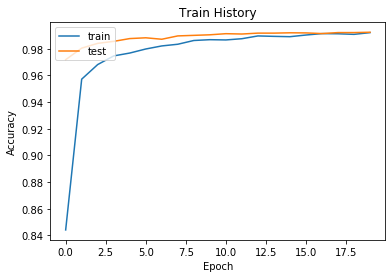

In [31]:
show_train_history('acc','val_acc')

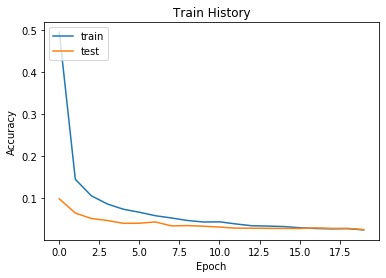

In [32]:
# 畫出訓練與測試在不同Epoch(迭代)的誤差
show_train_history('loss','val_loss')

# 評估模型準確率

In [33]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 19s 2ms/step


0.993

# 預測結果

In [34]:
#將測試資料10000筆進行預測
prediction=model.predict_classes(x_Test4D_normalize)

In [35]:
#顯示前10比預測結果
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

# 查看預測結果

In [36]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

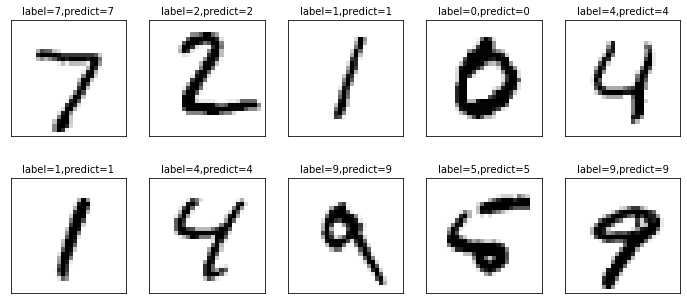

In [37]:
#顯示前10比預測結果 (測試資料,label-實際值,predict-預測值)
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [38]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,2,1,1,0
1,0,1132,1,0,0,1,0,0,1,0
2,1,1,1027,0,0,0,0,2,1,0
3,0,0,1,1002,0,4,0,1,2,0
4,0,0,0,0,978,0,1,0,1,2
5,0,0,0,3,0,887,1,0,0,1
6,3,2,0,0,3,3,946,0,1,0
7,0,1,2,0,0,0,0,1020,1,4
8,1,0,1,2,0,2,0,1,964,3
